In [1]:
'''The plan is to simulate stellar mass following the well-known IMF to obtain a random star
out of 10.000 generated or take them all and test them with a selected randomly pair of (M, P) 
and compute the eclipsing time and probabilities many times to obtain the final dependence 
of number of transits with stellar mass.'''

#Standard python packages

from astropy import constants as c
from math import factorial as fac
import matplotlib.pyplot as plt
import numpy as np
import random
import IMF_Generator

import matplotlib as mpl
mpl.rc('image', interpolation='nearest', origin='lower')
%matplotlib inline

In [2]:
'''Stellar Mass Distribution
Assuming stellar mass follows a Salpeter 1955 IMF with slope = -2.35
Stellar mass from 0.1 to 10 solar masses'''

slopes   = [2.35]                        #Inside the script is already negative
masslims = [0.1, 10]                     #Mass limits
myimf    = IMF_Generator.MultiPartPowerLaw(np.array(slopes), np.array(masslims))
m        = np.linspace(masslims[0],masslims[-1], 200)
lnpdf    = myimf.pdf(m)
cdf      = myimf.cdf(m)
N        = 10000                         #Number of stars to generate following the given IMF
ranmass  = myimf.rvs(N)                  #They'll be stored here eventually

In [3]:
'''This computes the period and mass distribution of exoplanets taking into account
that there exist a weak correlation between these parameters. Therefore, the distributions
are obtained using a beta and gamma distribution functions as mentioned in Ing-Guey Jian et al, 2007.'''

M = []                                           #Planet Mass array
P = []                                           #Planet Period array

k = 0
while (k < N):                                   #It generates 10000 planet (M, P) pairs
                                                 #0.008 < M < 26.7 and 0.8079 < P < 6776.1        
    Alpha_m = random.gammavariate(0.5779, 1.0)
    Beta_m  = random.gammavariate(5.5115, 1.0)
    Alpha_p = random.gammavariate(0.2952, 1.0)
    Beta_p  = random.gammavariate(3.4484, 1.0)
    Delta_1 = random.gammavariate(0.0745, 1.0)
    Delta_2 = random.gammavariate(0.3961, 1.0)
    
    M1 = 155.5*(Alpha_m + Delta_1) / (Alpha_m + Delta_1 + Beta_m + Delta_2)
    P1 = 11650.0*(Alpha_p + Delta_1) / (Alpha_p + Delta_1 + Beta_p + Delta_2)
    
    if (M1 > 0.008 and M1 < 26.7) and (P1 > 0.8079 and P1 < 6776.1):
        
        M.append(M1)
        P.append(P1)
        
        k = k + 1

In [4]:
'''Functions and definitions used along the distributions'''

G         = 2.959e-4           # AU^3 / Msun day^2
Masses_CF = 9.5458e-4          #From jupiter mass to solar mass

def MajorAxis(M, m, P):
    
    #M and m in solar mass, P in days = Major axis in AU
    return (G * (M + m) / (4.0*np.pi**2))**(1.0/3.0) * P**(2.0/3.0)

def Eclipsing_Time(M, m, P, epsilon):
    return P * (epsilon / np.pi) * (m / (2.0*M))**(1.0/3.0)

def ocurrence(a, m, M, R, e, epsilon):
    #a in AU, m and M in solar mass, R in AU
    
    RH = epsilon * ( a*(1 - e)*(m / (3.0*M) )**(1.0/3.0) )
    #return R/a              #Point-planet
    return (RH + R) / a      #Hill sphere radius

def Real_prob(Gaia_lifetime, Eclising_duration, Trials):
    return 1.0 - ( (Gaia_lifetime - Eclising_duration) / Gaia_lifetime )**Trials

def Prob_total(p1, p2, p3, p4):
    return np.array(p1*p2*p3*p4)

In [5]:
# Star_mass     = np.sort(ranmass)           #Solar Masses

# Mass_period = np.array([M, P])             #In Mj and days
# #Mass_period = Mass_period[::, Mass_period[0,].argsort()[::-1]] #Sorting by mass


# Counter = np.linspace(0, N, N + 1)         #It creates the 10000 counters
# Planet_mass   = []                         #Planet mass will be stored here (M_sun)
# Planet_period = []                         #Planet period will be stored here (days)

# for i in range(5):                                                         #Creates 5 pairs
    
#     Random_position = random.choice(Counter)                               #Random position is picked-up
#     #print(Mass_period_tuple[0:, int(Random_position)])
#     Planet_mass.append(Mass_period[0:, int(Random_position)][0]*Masses_CF) #Picks a mass (M_sun)
#     Planet_period.append(Mass_period[0:, int(Random_position)][1])         #Picks a period (days)    

# #print(Planet_mass, Planet_period)   

# Re_order = np.array([Planet_mass, Planet_period])    
# Re_order = Re_order[::, Re_order[0,].argsort()[::-1]]   

# Planet_mass   = Re_order[0:,][0]                         #Planet mass will be stored here (M_sun)
# Planet_period = Re_order[0:,][1]                         #Planet period will be stored here (days)
# #print(Planet_mass, Planet_period)
# plt.figure(figsize = (8,6))

# for j in range(5):
    
#     Planet_maxis  = np.array(MajorAxis(Star_mass, Planet_mass[j], Planet_period[j]))
#     R_sun         = 0.00465                              #In AU
#     R_star        = np.array(R_sun * (Star_mass)**0.8)   #Following a Main Sequence Mass-to-Radius relation

#     Prob   = ocurrence(Planet_maxis, Planet_mass[j], Star_mass, R_star, e = 0.0, epsilon = 0.3)
#     E_time = Eclipsing_Time(Star_mass, Planet_mass[j], Planet_period[j], epsilon = 0.3)

#     P1     = 0.17                                   #Cassen et al. 2012 for (0.3-10M_J) within (0.5-10AU)
#     P2     = 1.00                                   #Best case
#     P3     = Prob                                   #Planet_mass = 10M_J, Planet_period = 5yr, epsilon = 0.3
#     P4     = Real_prob(Planet_period[j], E_time, 70.0) #Gaia NO-observation probability
    
    
#     plt.scatter(Star_mass, Prob_total(P1, P2, P3, P4)*10000, s = 4, label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[j]/Masses_CF, Planet_period[j]))
    
# plt.xlabel(r'Stellar mass [M$_\odot$]', size = 15)
# plt.ylabel('Number of Dectections', size = 15)
# plt.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3);

# plt.savefig('StellarMass_Detections.png')

In [6]:
# plt.rc('xtick', labelsize = 12) 
# plt.rc('ytick', labelsize = 12) 

# Color = np.linspace(0.1, 10.0, 10000)     #Creates 16 different colors
# cm    = plt.cm.get_cmap('RdYlBu_r')

# fig, ((axA, axB), (axC, axD)) = plt.subplots(figsize = (18,12), nrows = 2, ncols = 2)

# for k in range(5):
    
        
#     Planet_maxis  = np.array(MajorAxis(Star_mass, Planet_mass[k], Planet_period[k]))
#     R_sun         = 0.00465                              #In AU
#     R_star        = np.array(R_sun * (Star_mass)**0.8)   #Following a Main Sequence Mass-to-Radius relation

#     Prob   = ocurrence(Planet_maxis, Planet_mass[k], Star_mass, R_star, e = 0.0, epsilon = 0.3)
#     E_time = Eclipsing_Time(Star_mass, Planet_mass[k], Planet_period[k], epsilon = 0.3)

#     P1     = 0.17                                   #Cassen et al. 2012 for (0.3-10M_J) within (0.5-10AU)
#     P2     = 1.00                                   #Best case
#     P3     = Prob                                   #Planet_mass = 10M_J, Planet_period = 5yr, epsilon = 0.3
#     P4     = Real_prob(Planet_period[k], E_time, 70.0) #Gaia NO-observation probability
    
#     A = axA.scatter(Prob_total(P1, P2, P3, P4), E_time, c  = Color, cmap = cm, s = 4)
#     B = axB.scatter(Prob_total(P1, P2, P3, P4)*10000, E_time, c  = Color, cmap = cm, s = 4)
    
#     C = axC.scatter(Prob_total(P1, P2, P3, P4), E_time, s = 4, label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[k]/Masses_CF, Planet_period[k]))
#     D = axD.scatter(Prob_total(P1, P2, P3, P4)*10000, E_time, s = 4, label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[k]/Masses_CF, Planet_period[k]))
    
# axA.set_xlabel('Detection Probability', size = 16)
# axA.set_ylabel('Eclipse Duration [days]', size = 16)
# cbar_A = plt.colorbar(A, ax = axA, pad = 0.005)
# cbar_A.set_label(r'Stellar mass [M$_\odot$]', rotation = 90, size = 15, labelpad = 17)

# axB.set_xlabel('Number of Detections', size = 16)
# axB.set_ylabel('Eclipse Duration [days]', size = 16)
# cbar_B = plt.colorbar(B, ax = axB, pad = 0.005)
# cbar_B.set_label(r'Stellar mass [M$_\odot$]', rotation = 90, size = 15, labelpad = 17)

# axC.set_xlabel('Detection Probability', size = 16)
# axC.set_ylabel('Eclipse Duration [days]', size = 16)
# axC.legend(frameon = False, loc = 'best', prop = {'size': 11}, markerscale = 3)

# axD.set_xlabel('Number of Detections', size = 16)
# axD.set_ylabel('Eclipse Duration [days]', size = 16)
# axD.legend(frameon = False, loc = 'best', prop = {'size': 11}, markerscale = 3)

# plt.savefig('Probabilities.png')

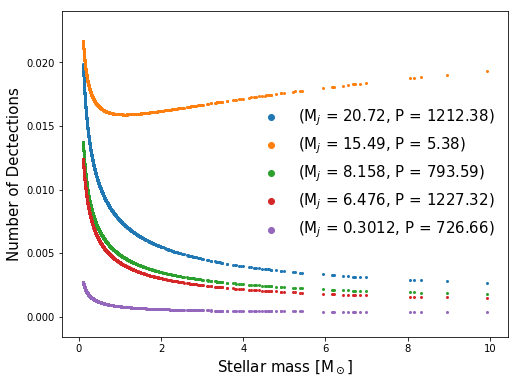

In [7]:
Star_mass     = np.sort(ranmass)           #Solar Masses

Mass_period = np.array([M, P])             #In Mj and days
#Mass_period = Mass_period[::, Mass_period[0,].argsort()[::-1]] #Sorting by mass


Counter = np.linspace(0, N, N + 1)         #It creates the 10000 counters
Planet_mass   = []                         #Planet mass will be stored here (M_sun)
Planet_period = []                         #Planet period will be stored here (days)

kk = 0
while (kk < 5):                                                            #Creates 5 pairs
    
    Random_position = random.choice(Counter)                               #Random position is picked-up
    #print(Mass_period_tuple[0:, int(Random_position)])
    
    if (Mass_period[0:, int(Random_position)][1] < 1825.0):
        
        Planet_mass.append(Mass_period[0:, int(Random_position)][0]*Masses_CF) #Picks a mass (M_sun)
        Planet_period.append(Mass_period[0:, int(Random_position)][1])         #Picks a period (days)   
        
        kk = kk + 1

#print(Planet_mass, Planet_period)   

Re_order = np.array([Planet_mass, Planet_period])    
Re_order = Re_order[::, Re_order[0,].argsort()[::-1]]   

Planet_mass   = Re_order[0:,][0]                         #Planet mass will be stored here (M_sun)
Planet_period = Re_order[0:,][1]                         #Planet period will be stored here (days)
#print(Planet_mass, Planet_period)
plt.figure(figsize = (8,6))

for j in range(5):
    
    Planet_maxis  = np.array(MajorAxis(Star_mass, Planet_mass[j], Planet_period[j]))
    R_sun         = 0.00465                              #In AU
    R_star        = np.array(R_sun * (Star_mass)**0.8)   #Following a Main Sequence Mass-to-Radius relation

    Prob   = ocurrence(Planet_maxis, Planet_mass[j], Star_mass, R_star, e = 0.0, epsilon = 0.3)
    E_time = Eclipsing_Time(Star_mass, Planet_mass[j], Planet_period[j], epsilon = 0.3)

    P1     = 0.17                                   #Cassen et al. 2012 for (0.3-10M_J) within (0.5-10AU)
    P2     = 1.00                                   #Best case
    P3     = Prob                                   #Planet_mass = 10M_J, Planet_period = 5yr, epsilon = 0.3
    P4     = Real_prob(Planet_period[j], E_time, 70.0) #Gaia NO-observation probability
    
    plt.scatter(Star_mass, Prob_total(P1, P2, P3, P4), s = 4, label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[j]/Masses_CF, Planet_period[j]))
    
plt.xlabel(r'Stellar mass [M$_\odot$]', size = 15)
plt.ylabel('Number of Dectections', size = 15)
plt.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3);

plt.savefig('StellarMass_Detections_Random_1.png')

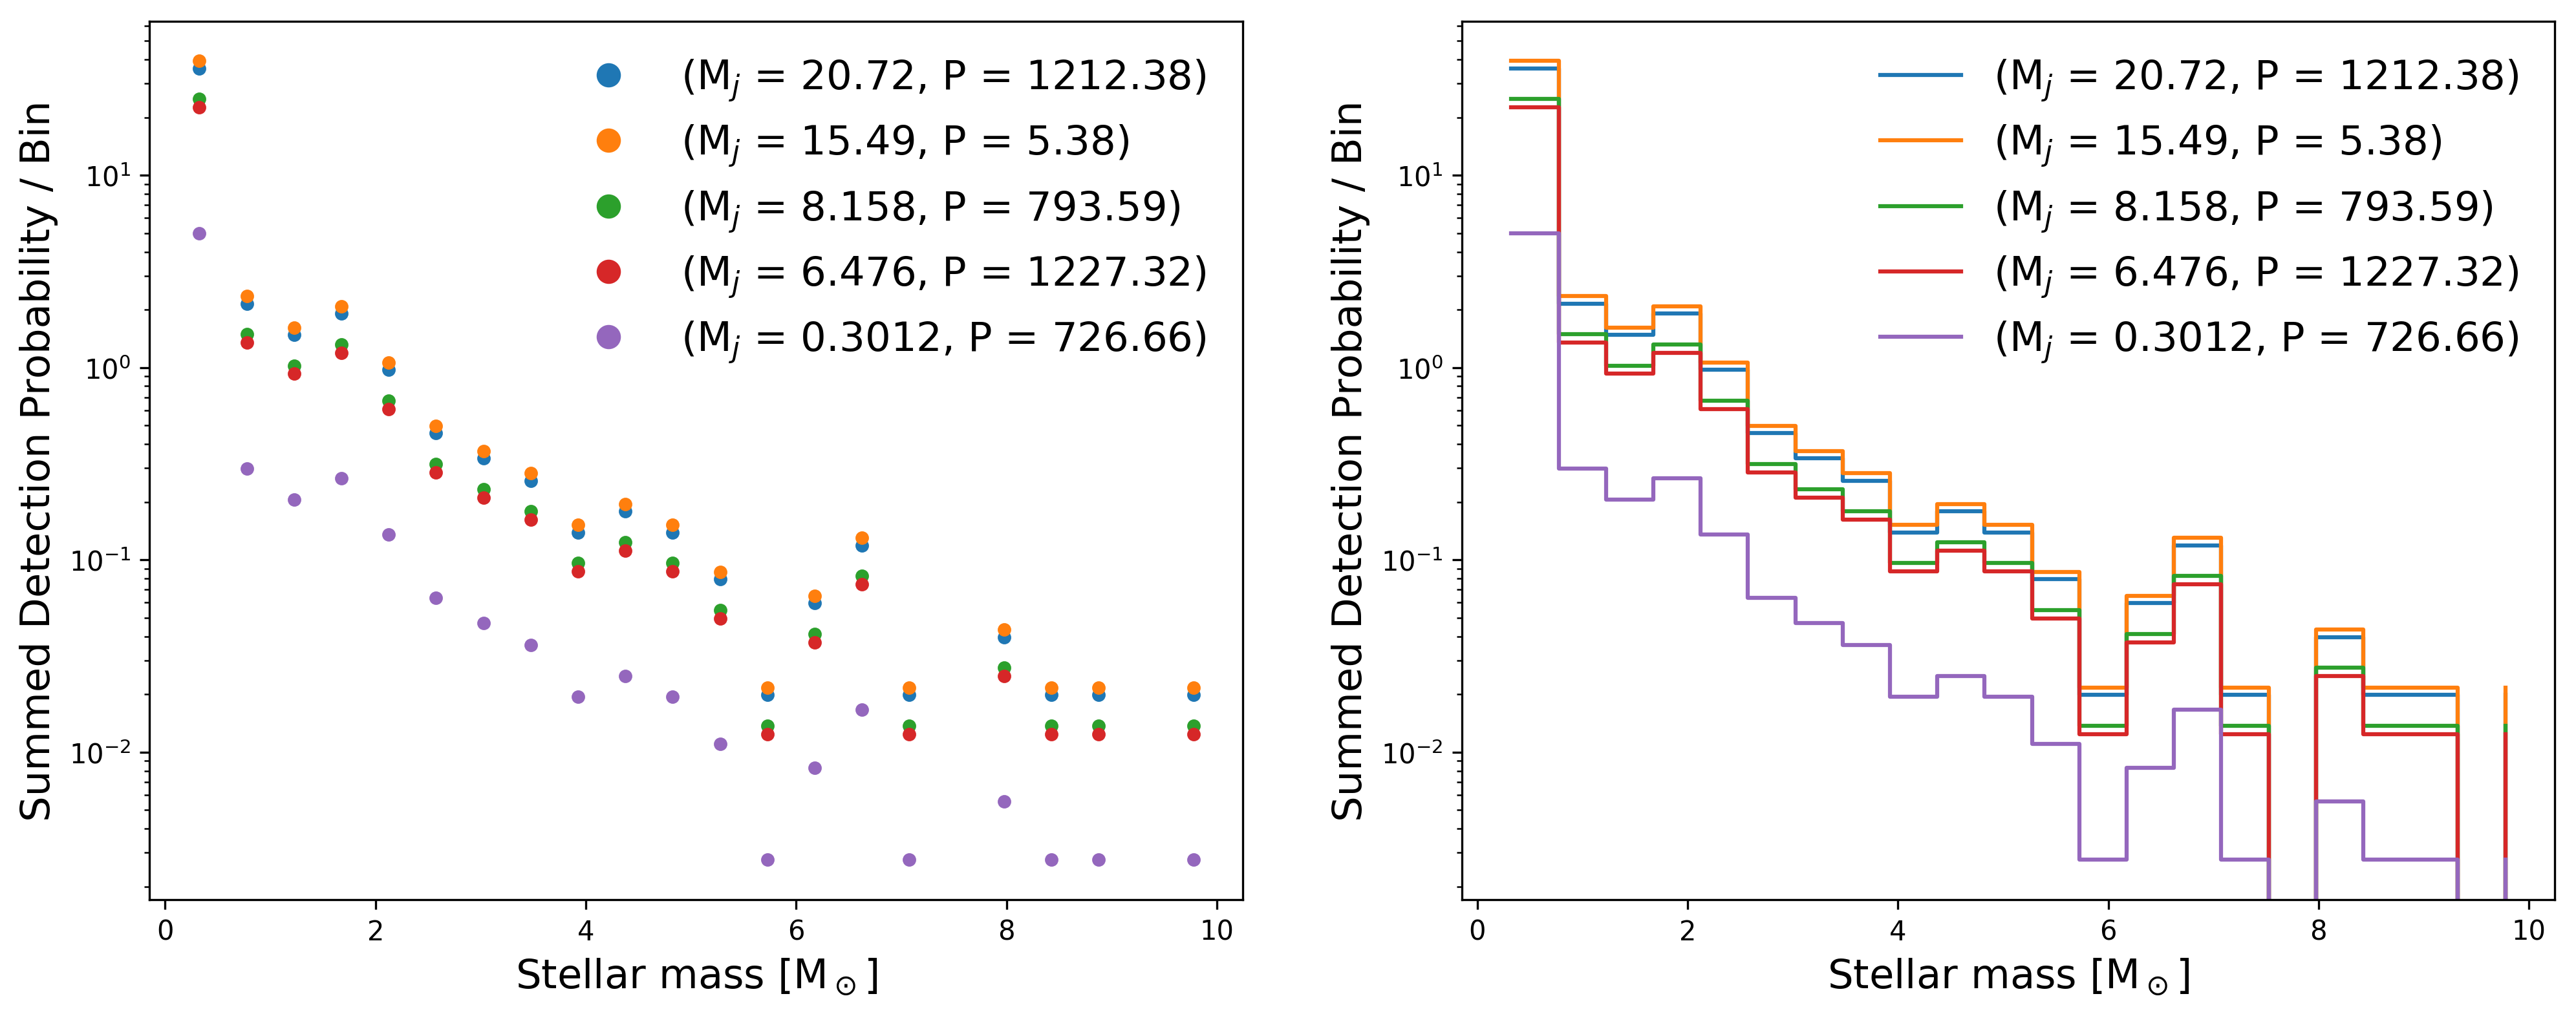

In [8]:
Planet_mass   = Re_order[0:,][0]                         #Planet mass will be stored here (M_sun)
Planet_period = Re_order[0:,][1]                         #Planet period will be stored here (days)
Number = np.linspace(0.1, 10, 23)

fig, ((axA, axB)) = plt.subplots(figsize = (16,6), nrows = 1, ncols = 2, dpi = 300)

for j in range(5):
    
    Planet_maxis  = np.array(MajorAxis(Star_mass, Planet_mass[j], Planet_period[j]))
    R_sun         = 0.00465                              #In AU
    R_star        = np.array(R_sun * (Star_mass)**0.8)   #Following a Main Sequence Mass-to-Radius relation

    Prob   = ocurrence(Planet_maxis, Planet_mass[j], Star_mass, R_star, e = 0.0, epsilon = 0.3)
    E_time = Eclipsing_Time(Star_mass, Planet_mass[j], Planet_period[j], epsilon = 0.3)

    P1     = 0.17                                       #Cassen et al. 2012 for (0.3-10M_J) within (0.5-10AU)
    P2     = 1.00                                       #Best case
    P3     = Prob                                       #Planet_mass = 10M_J, Planet_period = 5yr, epsilon = 0.3
    P4     = Real_prob(Planet_period[j], E_time, 70.0)  #Gaia NO-observation probability

    #Stellar mass and Total Probability array
    SMass_Prob = np.array([Star_mass, Prob_total(P1, P2, P3, P4)]) #If I do not introduce the correction

    Summed_Detections   = []
    Bins                = []
    #NNN = []

    for i in range(len(Number) - 1):
    
        Detections = []
        Bins.append( (Number[i] + Number[i+1])/2.0 )
        #NNN.append((Number[i] + Number[i+1])/2.0 - Number[i+1])
        
        for k in range(len(Star_mass)):
        
        #Selecting stars within mass bins and correcting if their mass is less than 1.3M_sun
        
            if ((SMass_Prob[0:,k][0] > Number[i]) and (SMass_Prob[0:,k][0] < Number[i+1]) and (SMass_Prob[0:,k][0] < 1.3)):
                Detections.append(SMass_Prob[0:,j][1]/5.0) #Correction 
            elif ((SMass_Prob[0:,k][0] > Number[i]) and (SMass_Prob[0:,k][0] < Number[i+1])):  
                Detections.append(SMass_Prob[0:,j][1])
                
            #No-Corrected Plot  
#               if ((SMass_Prob[0:,k][0] > Number[i]) and (SMass_Prob[0:,k][0] < Number[i+1])):
#                   B.append(SMass_Prob[0:,j][1])
            
        Summed_Detections.append(np.sum(Detections)) 

    axA.plot(Bins, Summed_Detections, '.', ms = 8, label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[j]/Masses_CF, Planet_period[j]))
    #axB.bar(Bins, Summed_Detections, width = 0.45, label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[j]/Masses_CF, Planet_period[j])) #0.45 ( (N[i] + N[i+1])/2 - N[i+1] )*2
    #axB.plot(Bins, Summed_Detections, linestyle = 'steps', label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[j]/Masses_CF, Planet_period[j])) #0.45 ( (N[i] + N[i+1])/2 - N[i+1] )*2
    axB.step(Bins, Summed_Detections, where  = 'post', label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[j]/Masses_CF, Planet_period[j])) #0.45 ( (N[i] + N[i+1])/2 - N[i+1] )*2

axA.set_yscale('log')
axA.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15)
axA.set_ylabel('Summed Detection Probability / Bin', size = 15)
axA.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 2)

axB.set_yscale('log')
axB.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15)
axB.set_ylabel('Summed Detection Probability / Bin', size = 15)
axB.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 2)

# plt.savefig('StellarMass_Detections_Random_1_NoCorrection.png')
plt.savefig('StellarMass_Detections_Random_1_Correction.png')

In [9]:
# plt.rc('xtick', labelsize = 12) 
# plt.rc('ytick', labelsize = 12) 

# Color = np.linspace(0.1, 10.0, 10000)     #Creates 16 different colors
# cm    = plt.cm.get_cmap('RdYlBu_r')

# fig, ((axA, axB), (axC, axD)) = plt.subplots(figsize = (18,12), nrows = 2, ncols = 2)

# for k in range(5):
    
        
#     Planet_maxis  = np.array(MajorAxis(Star_mass, Planet_mass[k], Planet_period[k]))
#     R_sun         = 0.00465                              #In AU
#     R_star        = np.array(R_sun * (Star_mass)**0.8)   #Following a Main Sequence Mass-to-Radius relation

#     Prob   = ocurrence(Planet_maxis, Planet_mass[k], Star_mass, R_star, e = 0.0, epsilon = 0.3)
#     E_time = Eclipsing_Time(Star_mass, Planet_mass[k], Planet_period[k], epsilon = 0.3)

#     P1     = 0.17                                   #Cassen et al. 2012 for (0.3-10M_J) within (0.5-10AU)
#     P2     = 1.00                                   #Best case
#     P3     = Prob                                   #Planet_mass = 10M_J, Planet_period = 5yr, epsilon = 0.3
#     P4     = Real_prob(Planet_period[k], E_time, 70.0) #Gaia NO-observation probability
    
#     A = axA.scatter(Prob_total(P1, P2, P3, P4), E_time, c  = Color, cmap = cm, s = 4)
#     B = axB.scatter(Prob_total(P1, P2, P3, P4)*10000, E_time, c  = Color, cmap = cm, s = 4)
    
#     C = axC.scatter(Prob_total(P1, P2, P3, P4), E_time, s = 4, label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[k]/Masses_CF, Planet_period[k]))
#     D = axD.scatter(Prob_total(P1, P2, P3, P4)*10000, E_time, s = 4, label = r'(M$_j$ = %.4g, P = %.2f)'%(Planet_mass[k]/Masses_CF, Planet_period[k]))
    
# axA.set_xlabel('Detection Probability', size = 16)
# axA.set_ylabel('Eclipse Duration [days]', size = 16)
# cbar_A = plt.colorbar(A, ax = axA, pad = 0.005)
# cbar_A.set_label(r'Stellar mass [M$_\odot$]', rotation = 90, size = 15, labelpad = 17)

# axB.set_xlabel('Number of Detections', size = 16)
# axB.set_ylabel('Eclipse Duration [days]', size = 16)
# cbar_B = plt.colorbar(B, ax = axB, pad = 0.005)
# cbar_B.set_label(r'Stellar mass [M$_\odot$]', rotation = 90, size = 15, labelpad = 17)

# axC.set_xlabel('Detection Probability', size = 16)
# axC.set_ylabel('Eclipse Duration [days]', size = 16)
# axC.legend(frameon = False, loc = 'best', prop = {'size': 11}, markerscale = 3)

# axD.set_xlabel('Number of Detections', size = 16)
# axD.set_ylabel('Eclipse Duration [days]', size = 16)
# axD.legend(frameon = False, loc = 'best', prop = {'size': 11}, markerscale = 3)

# plt.savefig('Probabilities_1.png')